In [1]:
import uproot  # For loading ROOT files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from dataAnalyse import CCV2
from torch_geometric.data import DataLoader 

In [3]:
testpath = "/vols/cms/mm1221/Data/2pi/test/"  # Replace with your ROOT file path
data_test = CCV2(testpath, max_events=12000, inp = 'test')

test_loader = DataLoader(data_test, batch_size=1, shuffle=False, follow_batch=['x'])

### Loading tracksters data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:03<00:00,  3.02s/it]
/cvmfs/sft.cern.ch/lcg/views/LCG_105a_cuda/x86_64-el9-gcc11-opt/lib/python3.9/site-packages/torch_geometric/deprecation.py:22: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [4]:
# Initialize model and load state dictionary
from model import Net
model = Net(hidden_dim = 128, num_layers = 3, dropout = 0.2, contrastive_dim = 128)
checkpoint= torch.load('/vols/cms/mm1221/hgcal/TrackPi/StaticEdge/results/init/results_lr0.001_bs32_hd128_nl3_do0.2_k12_cd128/best_model.pt',  map_location=torch.device('cpu'))
model.load_state_dict(checkpoint)  # Directly use the loaded checkpoint
model.eval()  # Set model to evaluation mode

Net(
  (lc_encode): Sequential(
    (0): Linear(in_features=15, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ELU(alpha=1.0)
  )
  (convs): ModuleList(
    (0-2): 3 x CustomStaticEdgeConv(
      (nn_module): Sequential(
        (0): Linear(in_features=256, out_features=128, bias=True)
        (1): ELU(alpha=1.0)
        (2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
  )
  (output): Sequential(
    (0): Linear(in_features=128, out_features=32, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=16, out_features=128, bias=True)
  )
)

In [5]:
from torch_geometric.nn import knn_graph

all_predictions = []  # List to store predictions for all events

# Loop through all events in the test dataset
for i, data in enumerate(data_test):
    print(f"Processing event {i+1}/{len(data_test)}...")

    # Compute k-nearest neighbor graph for the event
    edge_index = knn_graph(data.x, k=12)  # Adjust 'k' as needed
    
    # Generate predictions for the event
    predictions = model(data.x, edge_index, 1)
    
    # Store predictions
    all_predictions.append(predictions[0].detach().cpu().numpy())  # Convert to numpy if needed

# Convert list of predictions to a single numpy array
all_predictions = np.array(all_predictions)

# Print result
print("Predictions for all events shape:", all_predictions.shape)


Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 291/3530...
Processing event 292/3530...
Processing event 293/3530...
Processing event 294/3530...
Processing event 295/3530...
Processing event 296/3530...
Processing event 297/3530...
Processing event 298/3530...
Processing event 299/3530...
Processing event 300/3530...
Processing event 301/3530...
Processing event 302/3530...
Processing event 303/3530...
Processing event 304/3530...
Processing event 305/3530...
Processing event 306/3530...
Processing event 307/3530...
Processing event 308/3530...
Processing event 309/3530...
Processing event 310/3530...
Processing event 311/3530...
Processing event 312/3530...
Processing event 313/3530...
Processing event 314/3530...
Processing event 315/3530...
Processing event 316/3530...
Processing event 317/3530...
Processing event 318/3530...
Processing event 319/3530...
Processing event 320/3530...
Processing event 321/3530...
Processing event 322/3530...
Processing event 323/3530...
Processing event 324/3530...
Processing eve

Processing event 598/3530...
Processing event 599/3530...
Processing event 600/3530...
Processing event 601/3530...
Processing event 602/3530...
Processing event 603/3530...
Processing event 604/3530...
Processing event 605/3530...
Processing event 606/3530...
Processing event 607/3530...
Processing event 608/3530...
Processing event 609/3530...
Processing event 610/3530...
Processing event 611/3530...
Processing event 612/3530...
Processing event 613/3530...
Processing event 614/3530...
Processing event 615/3530...
Processing event 616/3530...
Processing event 617/3530...
Processing event 618/3530...
Processing event 619/3530...
Processing event 620/3530...
Processing event 621/3530...
Processing event 622/3530...
Processing event 623/3530...
Processing event 624/3530...
Processing event 625/3530...
Processing event 626/3530...
Processing event 627/3530...
Processing event 628/3530...
Processing event 629/3530...
Processing event 630/3530...
Processing event 631/3530...
Processing eve

Processing event 894/3530...
Processing event 895/3530...
Processing event 896/3530...
Processing event 897/3530...
Processing event 898/3530...
Processing event 899/3530...
Processing event 900/3530...
Processing event 901/3530...
Processing event 902/3530...
Processing event 903/3530...
Processing event 904/3530...
Processing event 905/3530...
Processing event 906/3530...
Processing event 907/3530...
Processing event 908/3530...
Processing event 909/3530...
Processing event 910/3530...
Processing event 911/3530...
Processing event 912/3530...
Processing event 913/3530...
Processing event 914/3530...
Processing event 915/3530...
Processing event 916/3530...
Processing event 917/3530...
Processing event 918/3530...
Processing event 919/3530...
Processing event 920/3530...
Processing event 921/3530...
Processing event 922/3530...
Processing event 923/3530...
Processing event 924/3530...
Processing event 925/3530...
Processing event 926/3530...
Processing event 927/3530...
Processing eve

Processing event 1186/3530...
Processing event 1187/3530...
Processing event 1188/3530...
Processing event 1189/3530...
Processing event 1190/3530...
Processing event 1191/3530...
Processing event 1192/3530...
Processing event 1193/3530...
Processing event 1194/3530...
Processing event 1195/3530...
Processing event 1196/3530...
Processing event 1197/3530...
Processing event 1198/3530...
Processing event 1199/3530...
Processing event 1200/3530...
Processing event 1201/3530...
Processing event 1202/3530...
Processing event 1203/3530...
Processing event 1204/3530...
Processing event 1205/3530...
Processing event 1206/3530...
Processing event 1207/3530...
Processing event 1208/3530...
Processing event 1209/3530...
Processing event 1210/3530...
Processing event 1211/3530...
Processing event 1212/3530...
Processing event 1213/3530...
Processing event 1214/3530...
Processing event 1215/3530...
Processing event 1216/3530...
Processing event 1217/3530...
Processing event 1218/3530...
Processing

Processing event 1473/3530...
Processing event 1474/3530...
Processing event 1475/3530...
Processing event 1476/3530...
Processing event 1477/3530...
Processing event 1478/3530...
Processing event 1479/3530...
Processing event 1480/3530...
Processing event 1481/3530...
Processing event 1482/3530...
Processing event 1483/3530...
Processing event 1484/3530...
Processing event 1485/3530...
Processing event 1486/3530...
Processing event 1487/3530...
Processing event 1488/3530...
Processing event 1489/3530...
Processing event 1490/3530...
Processing event 1491/3530...
Processing event 1492/3530...
Processing event 1493/3530...
Processing event 1494/3530...
Processing event 1495/3530...
Processing event 1496/3530...
Processing event 1497/3530...
Processing event 1498/3530...
Processing event 1499/3530...
Processing event 1500/3530...
Processing event 1501/3530...
Processing event 1502/3530...
Processing event 1503/3530...
Processing event 1504/3530...
Processing event 1505/3530...
Processing

Processing event 1770/3530...
Processing event 1771/3530...
Processing event 1772/3530...
Processing event 1773/3530...
Processing event 1774/3530...
Processing event 1775/3530...
Processing event 1776/3530...
Processing event 1777/3530...
Processing event 1778/3530...
Processing event 1779/3530...
Processing event 1780/3530...
Processing event 1781/3530...
Processing event 1782/3530...
Processing event 1783/3530...
Processing event 1784/3530...
Processing event 1785/3530...
Processing event 1786/3530...
Processing event 1787/3530...
Processing event 1788/3530...
Processing event 1789/3530...
Processing event 1790/3530...
Processing event 1791/3530...
Processing event 1792/3530...
Processing event 1793/3530...
Processing event 1794/3530...
Processing event 1795/3530...
Processing event 1796/3530...
Processing event 1797/3530...
Processing event 1798/3530...
Processing event 1799/3530...
Processing event 1800/3530...
Processing event 1801/3530...
Processing event 1802/3530...
Processing

Processing event 2051/3530...
Processing event 2052/3530...
Processing event 2053/3530...
Processing event 2054/3530...
Processing event 2055/3530...
Processing event 2056/3530...
Processing event 2057/3530...
Processing event 2058/3530...
Processing event 2059/3530...
Processing event 2060/3530...
Processing event 2061/3530...
Processing event 2062/3530...
Processing event 2063/3530...
Processing event 2064/3530...
Processing event 2065/3530...
Processing event 2066/3530...
Processing event 2067/3530...
Processing event 2068/3530...
Processing event 2069/3530...
Processing event 2070/3530...
Processing event 2071/3530...
Processing event 2072/3530...
Processing event 2073/3530...
Processing event 2074/3530...
Processing event 2075/3530...
Processing event 2076/3530...
Processing event 2077/3530...
Processing event 2078/3530...
Processing event 2079/3530...
Processing event 2080/3530...
Processing event 2081/3530...
Processing event 2082/3530...
Processing event 2083/3530...
Processing

Processing event 2331/3530...
Processing event 2332/3530...
Processing event 2333/3530...
Processing event 2334/3530...
Processing event 2335/3530...
Processing event 2336/3530...
Processing event 2337/3530...
Processing event 2338/3530...
Processing event 2339/3530...
Processing event 2340/3530...
Processing event 2341/3530...
Processing event 2342/3530...
Processing event 2343/3530...
Processing event 2344/3530...
Processing event 2345/3530...
Processing event 2346/3530...
Processing event 2347/3530...
Processing event 2348/3530...
Processing event 2349/3530...
Processing event 2350/3530...
Processing event 2351/3530...
Processing event 2352/3530...
Processing event 2353/3530...
Processing event 2354/3530...
Processing event 2355/3530...
Processing event 2356/3530...
Processing event 2357/3530...
Processing event 2358/3530...
Processing event 2359/3530...
Processing event 2360/3530...
Processing event 2361/3530...
Processing event 2362/3530...
Processing event 2363/3530...
Processing

Processing event 2615/3530...
Processing event 2616/3530...
Processing event 2617/3530...
Processing event 2618/3530...
Processing event 2619/3530...
Processing event 2620/3530...
Processing event 2621/3530...
Processing event 2622/3530...
Processing event 2623/3530...
Processing event 2624/3530...
Processing event 2625/3530...
Processing event 2626/3530...
Processing event 2627/3530...
Processing event 2628/3530...
Processing event 2629/3530...
Processing event 2630/3530...
Processing event 2631/3530...
Processing event 2632/3530...
Processing event 2633/3530...
Processing event 2634/3530...
Processing event 2635/3530...
Processing event 2636/3530...
Processing event 2637/3530...
Processing event 2638/3530...
Processing event 2639/3530...
Processing event 2640/3530...
Processing event 2641/3530...
Processing event 2642/3530...
Processing event 2643/3530...
Processing event 2644/3530...
Processing event 2645/3530...
Processing event 2646/3530...
Processing event 2647/3530...
Processing

Processing event 2908/3530...
Processing event 2909/3530...
Processing event 2910/3530...
Processing event 2911/3530...
Processing event 2912/3530...
Processing event 2913/3530...
Processing event 2914/3530...
Processing event 2915/3530...
Processing event 2916/3530...
Processing event 2917/3530...
Processing event 2918/3530...
Processing event 2919/3530...
Processing event 2920/3530...
Processing event 2921/3530...
Processing event 2922/3530...
Processing event 2923/3530...
Processing event 2924/3530...
Processing event 2925/3530...
Processing event 2926/3530...
Processing event 2927/3530...
Processing event 2928/3530...
Processing event 2929/3530...
Processing event 2930/3530...
Processing event 2931/3530...
Processing event 2932/3530...
Processing event 2933/3530...
Processing event 2934/3530...
Processing event 2935/3530...
Processing event 2936/3530...
Processing event 2937/3530...
Processing event 2938/3530...
Processing event 2939/3530...
Processing event 2940/3530...
Processing

Processing event 3192/3530...
Processing event 3193/3530...
Processing event 3194/3530...
Processing event 3195/3530...
Processing event 3196/3530...
Processing event 3197/3530...
Processing event 3198/3530...
Processing event 3199/3530...
Processing event 3200/3530...
Processing event 3201/3530...
Processing event 3202/3530...
Processing event 3203/3530...
Processing event 3204/3530...
Processing event 3205/3530...
Processing event 3206/3530...
Processing event 3207/3530...
Processing event 3208/3530...
Processing event 3209/3530...
Processing event 3210/3530...
Processing event 3211/3530...
Processing event 3212/3530...
Processing event 3213/3530...
Processing event 3214/3530...
Processing event 3215/3530...
Processing event 3216/3530...
Processing event 3217/3530...
Processing event 3218/3530...
Processing event 3219/3530...
Processing event 3220/3530...
Processing event 3221/3530...
Processing event 3222/3530...
Processing event 3223/3530...
Processing event 3224/3530...
Processing

Processing event 3466/3530...
Processing event 3467/3530...
Processing event 3468/3530...
Processing event 3469/3530...
Processing event 3470/3530...
Processing event 3471/3530...
Processing event 3472/3530...
Processing event 3473/3530...
Processing event 3474/3530...
Processing event 3475/3530...
Processing event 3476/3530...
Processing event 3477/3530...
Processing event 3478/3530...
Processing event 3479/3530...
Processing event 3480/3530...
Processing event 3481/3530...
Processing event 3482/3530...
Processing event 3483/3530...
Processing event 3484/3530...
Processing event 3485/3530...
Processing event 3486/3530...
Processing event 3487/3530...
Processing event 3488/3530...
Processing event 3489/3530...
Processing event 3490/3530...
Processing event 3491/3530...
Processing event 3492/3530...
Processing event 3493/3530...
Processing event 3494/3530...
Processing event 3495/3530...
Processing event 3496/3530...
Processing event 3497/3530...
Processing event 3498/3530...
Processing

/tmp/ipykernel_2164983/3237170132.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_predictions = np.array(all_predictions)


In [6]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import time

# Initialize lists to store cluster labels and clustering times
all_cluster_labels = []       # List to store cluster labels for all events
all_clustering_times = []     # List to store time taken for clustering each event

# Parameters for Agglomerative Clustering
distance_threshold = 0.65    # Adjust this value based on your data
linkage = 'average'           # Linkage criteria: 'ward', 'complete', 'average', 'single'
metric = 'cosine'             # Distance metric: 'cosine', 'euclidean', etc.
compute_distances = True      # Whether to compute distances between clusters

# Total number of events (for progress tracking)
total_events = len(all_predictions)

# Loop through all events in all_predictions
for i, pred in enumerate(all_predictions):
    print(f"Processing event {i+1}/{total_events}...")
    
    # Check if there are less than 2 samples (nodes)
    if len(pred) < 2:
        cluster_labels = np.ones(len(pred), dtype=int)  # Assign all nodes to cluster 1
    else:
        # Initialize AgglomerativeClustering with specified parameters
        agglomerative = AgglomerativeClustering(
            n_clusters=None,                  # Let the algorithm determine the number of clusters
            distance_threshold=distance_threshold,
            linkage=linkage,
            metric=metric,
            compute_distances=compute_distances
        )
        
        # Record the start time
        start_time = time.time()
        
        # Perform clustering
        cluster_labels = agglomerative.fit_predict(pred)  # pred = predictions for this event
        
        # Record the end time
        end_time = time.time()
        
        # Calculate the time taken for clustering
        clustering_time = end_time - start_time
        all_clustering_times.append(clustering_time)
    
    # Append the cluster labels to the list
    all_cluster_labels.append(cluster_labels)

# Convert the list of cluster labels and times to NumPy arrays
all_cluster_labels = np.array(all_cluster_labels)
all_clustering_times = np.array(all_clustering_times)

# Print results
print("\nClustering Results:")
print("Shape of all_cluster_labels:", all_cluster_labels.shape)
print("Cluster labels for first event:", all_cluster_labels[0])

# Print timing information
total_time = all_clustering_times.sum()
average_time = all_clustering_times.mean()
print(f"\nTotal clustering time: {total_time:.2f} seconds")
print(f"Average clustering time per event: {average_time:.4f} seconds")

Processing event 1/3530...
Processing event 2/3530...
Processing event 3/3530...
Processing event 4/3530...
Processing event 5/3530...
Processing event 6/3530...
Processing event 7/3530...
Processing event 8/3530...
Processing event 9/3530...
Processing event 10/3530...
Processing event 11/3530...
Processing event 12/3530...
Processing event 13/3530...
Processing event 14/3530...
Processing event 15/3530...
Processing event 16/3530...
Processing event 17/3530...
Processing event 18/3530...
Processing event 19/3530...
Processing event 20/3530...
Processing event 21/3530...
Processing event 22/3530...
Processing event 23/3530...
Processing event 24/3530...
Processing event 25/3530...
Processing event 26/3530...
Processing event 27/3530...
Processing event 28/3530...
Processing event 29/3530...
Processing event 30/3530...
Processing event 31/3530...
Processing event 32/3530...
Processing event 33/3530...
Processing event 34/3530...
Processing event 35/3530...
Processing event 36/3530...
P

Processing event 377/3530...
Processing event 378/3530...
Processing event 379/3530...
Processing event 380/3530...
Processing event 381/3530...
Processing event 382/3530...
Processing event 383/3530...
Processing event 384/3530...
Processing event 385/3530...
Processing event 386/3530...
Processing event 387/3530...
Processing event 388/3530...
Processing event 389/3530...
Processing event 390/3530...
Processing event 391/3530...
Processing event 392/3530...
Processing event 393/3530...
Processing event 394/3530...
Processing event 395/3530...
Processing event 396/3530...
Processing event 397/3530...
Processing event 398/3530...
Processing event 399/3530...
Processing event 400/3530...
Processing event 401/3530...
Processing event 402/3530...
Processing event 403/3530...
Processing event 404/3530...
Processing event 405/3530...
Processing event 406/3530...
Processing event 407/3530...
Processing event 408/3530...
Processing event 409/3530...
Processing event 410/3530...
Processing eve

Processing event 761/3530...
Processing event 762/3530...
Processing event 763/3530...
Processing event 764/3530...
Processing event 765/3530...
Processing event 766/3530...
Processing event 767/3530...
Processing event 768/3530...
Processing event 769/3530...
Processing event 770/3530...
Processing event 771/3530...
Processing event 772/3530...
Processing event 773/3530...
Processing event 774/3530...
Processing event 775/3530...
Processing event 776/3530...
Processing event 777/3530...
Processing event 778/3530...
Processing event 779/3530...
Processing event 780/3530...
Processing event 781/3530...
Processing event 782/3530...
Processing event 783/3530...
Processing event 784/3530...
Processing event 785/3530...
Processing event 786/3530...
Processing event 787/3530...
Processing event 788/3530...
Processing event 789/3530...
Processing event 790/3530...
Processing event 791/3530...
Processing event 792/3530...
Processing event 793/3530...
Processing event 794/3530...
Processing eve

Processing event 1147/3530...
Processing event 1148/3530...
Processing event 1149/3530...
Processing event 1150/3530...
Processing event 1151/3530...
Processing event 1152/3530...
Processing event 1153/3530...
Processing event 1154/3530...
Processing event 1155/3530...
Processing event 1156/3530...
Processing event 1157/3530...
Processing event 1158/3530...
Processing event 1159/3530...
Processing event 1160/3530...
Processing event 1161/3530...
Processing event 1162/3530...
Processing event 1163/3530...
Processing event 1164/3530...
Processing event 1165/3530...
Processing event 1166/3530...
Processing event 1167/3530...
Processing event 1168/3530...
Processing event 1169/3530...
Processing event 1170/3530...
Processing event 1171/3530...
Processing event 1172/3530...
Processing event 1173/3530...
Processing event 1174/3530...
Processing event 1175/3530...
Processing event 1176/3530...
Processing event 1177/3530...
Processing event 1178/3530...
Processing event 1179/3530...
Processing

Processing event 1449/3530...
Processing event 1450/3530...
Processing event 1451/3530...
Processing event 1452/3530...
Processing event 1453/3530...
Processing event 1454/3530...
Processing event 1455/3530...
Processing event 1456/3530...
Processing event 1457/3530...
Processing event 1458/3530...
Processing event 1459/3530...
Processing event 1460/3530...
Processing event 1461/3530...
Processing event 1462/3530...
Processing event 1463/3530...
Processing event 1464/3530...
Processing event 1465/3530...
Processing event 1466/3530...
Processing event 1467/3530...
Processing event 1468/3530...
Processing event 1469/3530...
Processing event 1470/3530...
Processing event 1471/3530...
Processing event 1472/3530...
Processing event 1473/3530...
Processing event 1474/3530...
Processing event 1475/3530...
Processing event 1476/3530...
Processing event 1477/3530...
Processing event 1478/3530...
Processing event 1479/3530...
Processing event 1480/3530...
Processing event 1481/3530...
Processing

Processing event 1926/3530...
Processing event 1927/3530...
Processing event 1928/3530...
Processing event 1929/3530...
Processing event 1930/3530...
Processing event 1931/3530...
Processing event 1932/3530...
Processing event 1933/3530...
Processing event 1934/3530...
Processing event 1935/3530...
Processing event 1936/3530...
Processing event 1937/3530...
Processing event 1938/3530...
Processing event 1939/3530...
Processing event 1940/3530...
Processing event 1941/3530...
Processing event 1942/3530...
Processing event 1943/3530...
Processing event 1944/3530...
Processing event 1945/3530...
Processing event 1946/3530...
Processing event 1947/3530...
Processing event 1948/3530...
Processing event 1949/3530...
Processing event 1950/3530...
Processing event 1951/3530...
Processing event 1952/3530...
Processing event 1953/3530...
Processing event 1954/3530...
Processing event 1955/3530...
Processing event 1956/3530...
Processing event 1957/3530...
Processing event 1958/3530...
Processing

Processing event 2446/3530...
Processing event 2447/3530...
Processing event 2448/3530...
Processing event 2449/3530...
Processing event 2450/3530...
Processing event 2451/3530...
Processing event 2452/3530...
Processing event 2453/3530...
Processing event 2454/3530...
Processing event 2455/3530...
Processing event 2456/3530...
Processing event 2457/3530...
Processing event 2458/3530...
Processing event 2459/3530...
Processing event 2460/3530...
Processing event 2461/3530...
Processing event 2462/3530...
Processing event 2463/3530...
Processing event 2464/3530...
Processing event 2465/3530...
Processing event 2466/3530...
Processing event 2467/3530...
Processing event 2468/3530...
Processing event 2469/3530...
Processing event 2470/3530...
Processing event 2471/3530...
Processing event 2472/3530...
Processing event 2473/3530...
Processing event 2474/3530...
Processing event 2475/3530...
Processing event 2476/3530...
Processing event 2477/3530...
Processing event 2478/3530...
Processing

Processing event 2780/3530...
Processing event 2781/3530...
Processing event 2782/3530...
Processing event 2783/3530...
Processing event 2784/3530...
Processing event 2785/3530...
Processing event 2786/3530...
Processing event 2787/3530...
Processing event 2788/3530...
Processing event 2789/3530...
Processing event 2790/3530...
Processing event 2791/3530...
Processing event 2792/3530...
Processing event 2793/3530...
Processing event 2794/3530...
Processing event 2795/3530...
Processing event 2796/3530...
Processing event 2797/3530...
Processing event 2798/3530...
Processing event 2799/3530...
Processing event 2800/3530...
Processing event 2801/3530...
Processing event 2802/3530...
Processing event 2803/3530...
Processing event 2804/3530...
Processing event 2805/3530...
Processing event 2806/3530...
Processing event 2807/3530...
Processing event 2808/3530...
Processing event 2809/3530...
Processing event 2810/3530...
Processing event 2811/3530...
Processing event 2812/3530...
Processing

Processing event 3297/3530...
Processing event 3298/3530...
Processing event 3299/3530...
Processing event 3300/3530...
Processing event 3301/3530...
Processing event 3302/3530...
Processing event 3303/3530...
Processing event 3304/3530...
Processing event 3305/3530...
Processing event 3306/3530...
Processing event 3307/3530...
Processing event 3308/3530...
Processing event 3309/3530...
Processing event 3310/3530...
Processing event 3311/3530...
Processing event 3312/3530...
Processing event 3313/3530...
Processing event 3314/3530...
Processing event 3315/3530...
Processing event 3316/3530...
Processing event 3317/3530...
Processing event 3318/3530...
Processing event 3319/3530...
Processing event 3320/3530...
Processing event 3321/3530...
Processing event 3322/3530...
Processing event 3323/3530...
Processing event 3324/3530...
Processing event 3325/3530...
Processing event 3326/3530...
Processing event 3327/3530...
Processing event 3328/3530...
Processing event 3329/3530...
Processing

/tmp/ipykernel_2164983/1731570689.py:52: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_cluster_labels = np.array(all_cluster_labels)


Processing Event 1/3530...


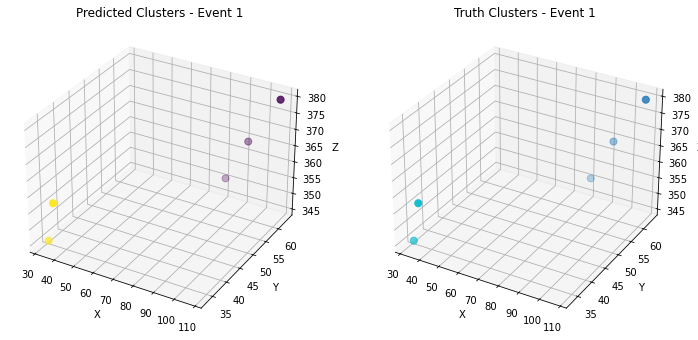

Processing Event 2/3530...


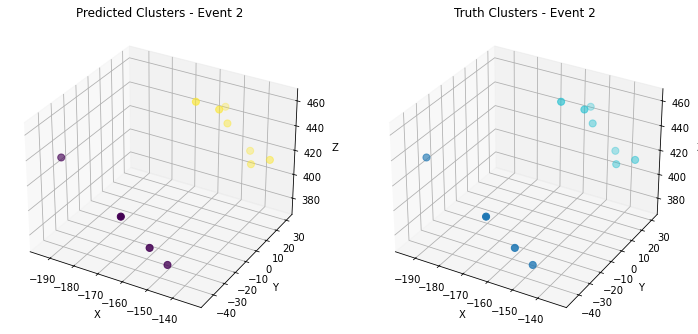

Processing Event 3/3530...


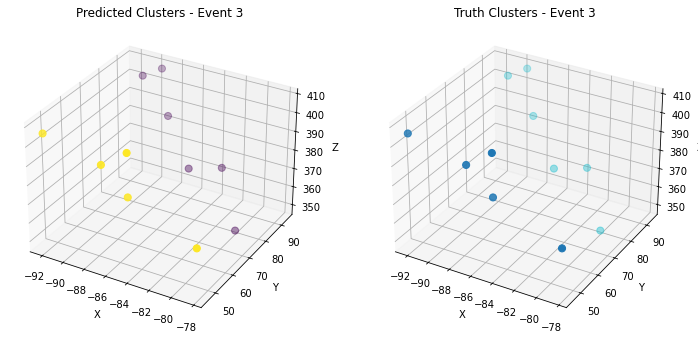

Processing Event 4/3530...


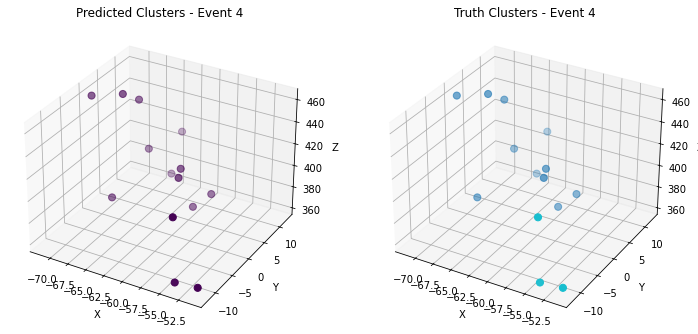

Processing Event 5/3530...


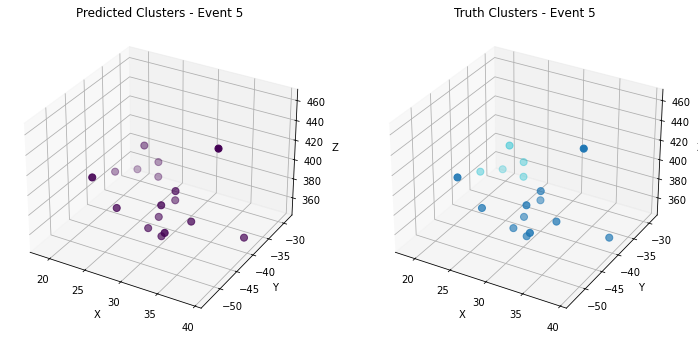

Processing Event 6/3530...


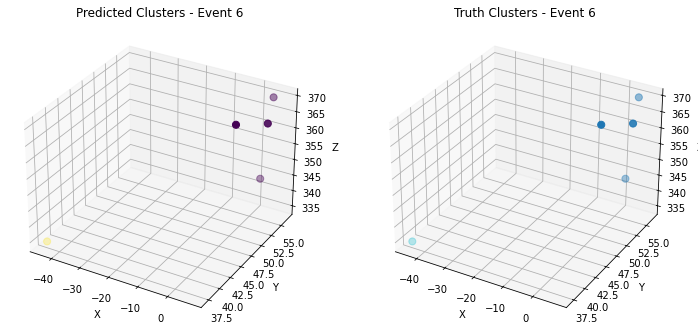

Processing Event 7/3530...


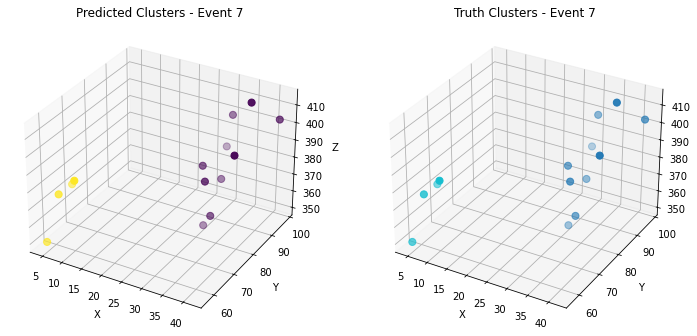

Processing Event 8/3530...


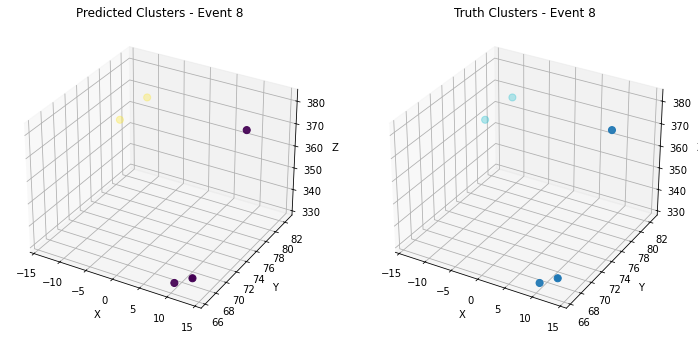

Processing Event 9/3530...


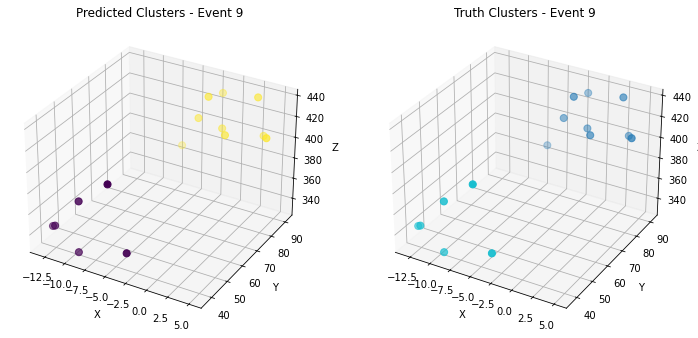

Processing Event 10/3530...


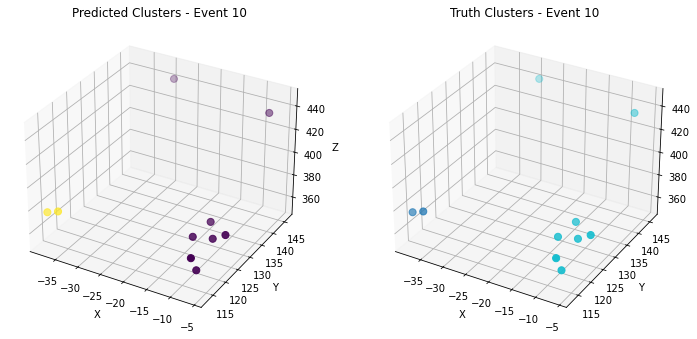

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Function to plot clusters
def plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels):
    fig = plt.figure(figsize=(12, 6))  # Set up the figure for side-by-side plots

    # Plot 1: Predicted clusters
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=cluster_labels, cmap='viridis', s=50)
    ax1.set_title(f"Predicted Clusters - Event {event_idx+1}")
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')

    # Plot 2: Truth clusters
    ax2 = fig.add_subplot(122, projection='3d')
    truth_colors = [label[0] for label in truth_labels]  # Use first entry of SimLabels as the cluster assignment
    ax2.scatter(xyz_coords[:, 0], xyz_coords[:, 1], xyz_coords[:, 2], c=truth_colors, cmap='tab10', s=50)
    ax2.set_title(f"Truth Clusters - Event {event_idx+1}")
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')

    plt.show()

# Loop over all events
for event_idx in range(10):
    print(f"Processing Event {event_idx+1}/{len(data_test)}...")

    # Extract data
    xyz_coords = data_test[event_idx].x[:, :3]  # Get x, y, z coordinates
    cluster_labels = all_cluster_labels[event_idx]  # Predicted cluster labels
    truth_labels = data_test[event_idx].assoc  # True SimLabels

    # Convert to numpy if not already
    xyz_coords = xyz_coords.cpu().numpy() if isinstance(xyz_coords, torch.Tensor) else xyz_coords
    cluster_labels = np.array(cluster_labels)
    truth_labels = np.array(truth_labels)

    # Plot for the current event
    plot_clusters(event_idx, xyz_coords, cluster_labels, truth_labels)


# Score Calculations

In [7]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.int().numpy() if isinstance(true_labels_event, torch.Tensor) else true_labels_event.astype(int)
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })

# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores.head())

Processing Events: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3530/3530 [00:15<00:00, 226.43it/s]

   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0    0.0           0.0           0.997793           0.988900   
1            0    0.0           1.0           0.000000           0.000000   
2            0    1.0           0.0           0.000000           0.000000   
3            0    1.0           1.0           0.988900           0.997793   
4            1    0.0           0.0           0.988720           0.791945   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0  45.490387         28.819340    1.887023      68.403633          -0.366474  
1  45.490387         45.490387    1.887023      68.403633           0.000000  
2  28.819340         28.819340    2.683286      68.403633           0.000000  
3  28.819340         45.490387    2.683286      68.403633           0.578467  
4  46.477142         43.417011    1.597911      71.320656          -0.065842  


In [8]:
import pandas as pd

# Placeholder for data_test (replace with your actual dataset)
# Example structure:
# data_test[i].StR_score -> tensor for SimToReco
# data_test[i].RtS_score -> tensor for RecoToSim

# Simulated data for demonstration
class EventData:
    def __init__(self, StR_score, RtS_score):
        self.StR_score = StR_score
        self.RtS_score = RtS_score

# Initialize an empty list for all event data
data = []

# Loop through each event in data_test
for event_index, event in enumerate(data_test):
    StR_score = event.StR_score  # SimToReco tensor
    RtS_score = event.RtS_score  # RecoToSim tensor
    
    # Determine dimensions
    num_cps = len(StR_score)  # Number of calo particles
    num_tracksters = len(RtS_score)  # Number of tracksters
    
    # Map scores
    for cp_id in range(num_cps):
        for trackster_id in range(num_tracksters):
            # Extract scalar values from tensors if they are tensors
            sim_to_reco_score = (
                StR_score[cp_id][trackster_id].item() 
                if hasattr(StR_score[cp_id][trackster_id], 'item') 
                else StR_score[cp_id][trackster_id]
            )
            reco_to_sim_score = (
                RtS_score[trackster_id][cp_id].item() 
                if hasattr(RtS_score[trackster_id][cp_id], 'item') 
                else RtS_score[trackster_id][cp_id]
            )
            
            # Append row to data list
            data.append({
                'event_index': event_index,
                'cp_id': cp_id,
                'trackster_id': trackster_id,
                'sim_to_reco_score': sim_to_reco_score,
                'reco_to_sim_score': reco_to_sim_score
            })

# Create DataFrame
df_CERN = pd.DataFrame(data)

# Display the resulting DataFrame
print(df_CERN)

       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
0                0      0             0           0.202020       5.831018e-07
1                0      0             1           1.000000       4.605221e-05
2                0      0             2           1.000000       0.000000e+00
3                0      1             0           0.518250       1.000000e+00
4                0      1             1           0.971559       1.000000e+00
...            ...    ...           ...                ...                ...
25125         3529      0             1           1.000000       0.000000e+00
25126         3529      0             2           1.000000       0.000000e+00
25127         3529      1             0           0.011682       1.000000e+00
25128         3529      1             1           0.999408       1.000000e+00
25129         3529      1             2           1.000000       1.000000e+00

[25130 rows x 5 columns]


In [9]:
print(df_CERN[df_CERN['event_index'] == 4])

    event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
30            4      0             0           0.252101           0.000011
31            4      0             1           0.993499           0.001653
32            4      0             2           0.994350           0.044667
33            4      0             3           0.995330           0.000090
34            4      0             4           0.999990           0.005508
35            4      0             5           1.000000           0.000758
36            4      0             6           1.000000           0.000000
37            4      1             0           0.768681           0.998746
38            4      1             1           0.993272           0.995442
39            4      1             2           0.998916           0.887687
40            4      1             3           0.999331           1.000000
41            4      1             4           1.000000           0.968678
42            4      1   

# Purity + Efficiency

In [10]:
print(df_scores)

       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0                0    0.0           0.0           0.997793           0.988900   
1                0    0.0           1.0           0.000000           0.000000   
2                0    1.0           0.0           0.000000           0.000000   
3                0    1.0           1.0           0.988900           0.997793   
4                1    0.0           0.0           0.988720           0.791945   
...            ...    ...           ...                ...                ...   
13237         3528    1.0           1.0           0.007775           0.006587   
13238         3529    0.0           0.0           1.000000           0.999285   
13239         3529    0.0           1.0           0.000000           0.000000   
13240         3529    1.0           0.0           0.000000           0.000000   
13241         3529    1.0           1.0           0.999285           1.000000   

       cp_energy  trackster

In [11]:
import pandas as pd

# Ensure 'cp_id' and 'trackster_id' are numeric for both dataframes
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Define a function to calculate efficiency and purity
def calculate_efficiency_purity(df, model_name):
    # ----- Efficiency Calculation -----
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0

    # ----- Purity Calculation -----
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0

    # Print results for the model
    print(f"\nModel: {model_name}")
    print(f"Efficiency: {efficiency:.4f} ({num_associated_cp} associated CPs out of {total_cp} total CPs)")
    print(f"Purity: {purity:.4f} ({num_associated_tst} associated Tracksters out of {total_tst} total Tracksters)")
    return cp_valid, tst_valid
# Calculate for both models
cp_valid, tst_valid = calculate_efficiency_purity(df_scores, "Your Model")

calculate_efficiency_purity(df_CERN, "CERN Model")



Model: Your Model
Efficiency: 0.9542 (6569 associated CPs out of 6884 total CPs)
Purity: 0.9629 (6457 associated Tracksters out of 6706 total Tracksters)

Model: CERN Model
Efficiency: 0.3339 (2352 associated CPs out of 7044 total CPs)
Purity: 0.9930 (12477 associated Tracksters out of 12565 total Tracksters)


(       event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score
 0                0      0             0           0.202020       5.831018e-07
 1                0      0             1           1.000000       4.605221e-05
 2                0      0             2           1.000000       0.000000e+00
 3                0      1             0           0.518250       1.000000e+00
 4                0      1             1           0.971559       1.000000e+00
 ...            ...    ...           ...                ...                ...
 25125         3529      0             1           1.000000       0.000000e+00
 25126         3529      0             2           1.000000       0.000000e+00
 25127         3529      1             0           0.011682       1.000000e+00
 25128         3529      1             1           0.999408       1.000000e+00
 25129         3529      1             2           1.000000       1.000000e+00
 
 [25130 rows x 5 columns],
        event_index  cp

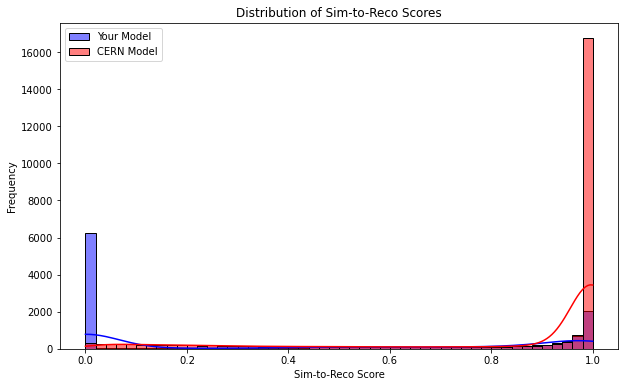

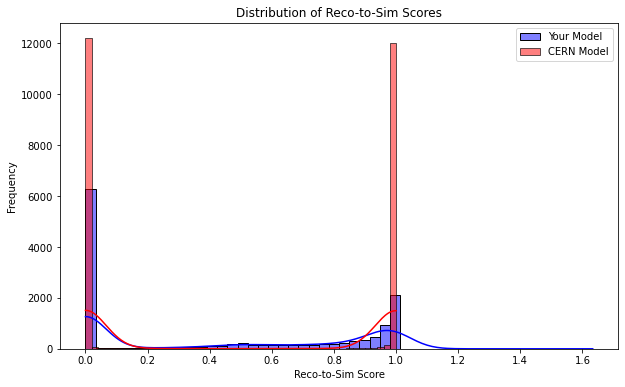

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Plotting Sim-to-Reco Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(cp_valid['sim_to_reco_score'], bins=50, kde=True, label='Your Model', color='blue')
sns.histplot(df_CERN['sim_to_reco_score'], bins=50, kde=True, label='CERN Model', color='red')
plt.title('Distribution of Sim-to-Reco Scores')
plt.xlabel('Sim-to-Reco Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# ----- Plotting Reco-to-Sim Score Distribution -----
plt.figure(figsize=(10, 6))
sns.histplot(tst_valid['reco_to_sim_score'], bins=50, kde=True, label='Your Model', color='blue')
sns.histplot(df_CERN['reco_to_sim_score'], bins=50, kde=True, label='CERN Model', color='red')
plt.title('Distribution of Reco-to-Sim Scores')
plt.xlabel('Reco-to-Sim Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Plot vs params

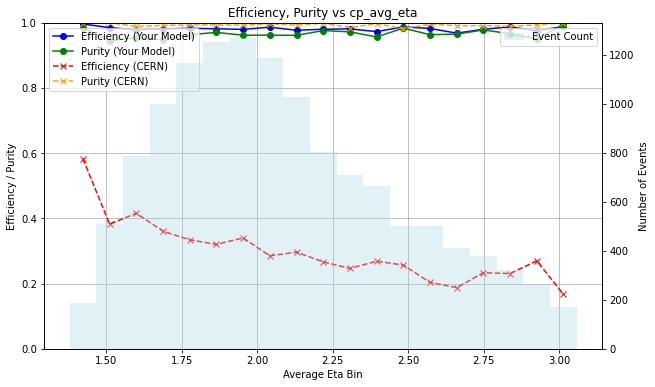

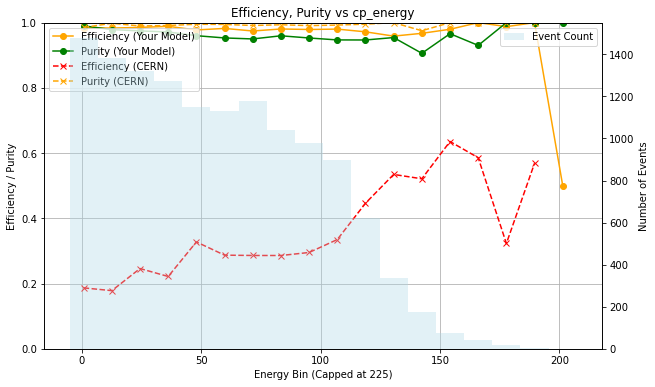

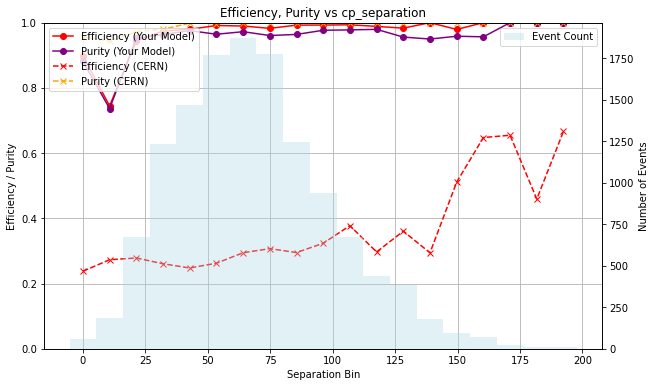

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---- Preprocessing ----
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

df_CERN['cp_id'] = pd.to_numeric(df_CERN['cp_id'], errors='coerce')
df_CERN['trackster_id'] = pd.to_numeric(df_CERN['trackster_id'], errors='coerce')

# Map Required Columns from df_scores to df_CERN
event_mapping = df_scores[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation']].drop_duplicates('event_index')
df_CERN = pd.merge(df_CERN, event_mapping, on='event_index', how='left')

# ---- Efficiency and Purity Calculation ----
def calculate_efficiency_purity(df):
    # Efficiency
    cp_valid = df.dropna(subset=['cp_id']).copy()
    cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])
    cp_associated = cp_grouped['sim_to_reco_score'].min() < 0.2
    cp_efficiency = cp_associated.groupby(level=0).mean().reset_index(name='efficiency')
    cp_valid = cp_valid.merge(cp_efficiency, on='event_index', how='left')

    # Purity
    tst_valid = df.dropna(subset=['trackster_id']).copy()
    tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])
    tst_associated = tst_grouped['reco_to_sim_score'].min() < 0.2
    tst_purity = tst_associated.groupby(level=0).mean().reset_index(name='purity')
    tst_valid = tst_valid.merge(tst_purity, on='event_index', how='left')

    # Merge into a single DataFrame
    df_plot = pd.merge(cp_valid[['event_index', 'cp_avg_eta', 'cp_energy', 'cp_separation', 'efficiency']],
                       tst_valid[['event_index', 'purity']],
                       on='event_index',
                       how='inner')
    return df_plot

df_plot = calculate_efficiency_purity(df_scores)
df_plot_CERN = calculate_efficiency_purity(df_CERN)

# ---- Binning ----
eta_bins = np.linspace(df_plot['cp_avg_eta'].min(), df_plot['cp_avg_eta'].max(), 20)
energy_bins = np.linspace(df_plot['cp_energy'].min(), 225, 20)  # Capped at 225
separation_bins = np.linspace(df_plot['cp_separation'].min(), df_plot['cp_separation'].max(), 20)

df_plot['eta_bin'] = pd.cut(df_plot['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot['energy_bin'] = pd.cut(df_plot['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot['separation_bin'] = pd.cut(df_plot['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

df_plot_CERN['eta_bin'] = pd.cut(df_plot_CERN['cp_avg_eta'], bins=eta_bins, labels=False, include_lowest=True)
df_plot_CERN['energy_bin'] = pd.cut(df_plot_CERN['cp_energy'], bins=energy_bins, labels=False, include_lowest=True)
df_plot_CERN['separation_bin'] = pd.cut(df_plot_CERN['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

def calculate_bin_error(numerator, denominator):
    if denominator > 0:
        efficiency = numerator / denominator
        error = np.sqrt(efficiency * (1 - efficiency) / denominator)
    else:
        efficiency = 0.0
        error = 0.0
    return efficiency, error

def aggregate_bins(data, bin_col):
    return data.groupby(bin_col).apply(lambda g: pd.Series({
        'efficiency_mean': g['efficiency'].mean(),
        'efficiency_error': calculate_bin_error(g['efficiency'].sum(), len(g))[1],
        'purity_mean': g['purity'].mean(),
        'purity_error': calculate_bin_error(g['purity'].sum(), len(g))[1],
        'count': len(g) // 4
    })).reset_index()

# Aggregate Data
eta_group = aggregate_bins(df_plot, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group = aggregate_bins(df_plot, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group = aggregate_bins(df_plot, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

eta_group_CERN = aggregate_bins(df_plot_CERN, 'eta_bin').set_index('eta_bin').reindex(range(len(eta_bins) - 1)).reset_index()
energy_group_CERN = aggregate_bins(df_plot_CERN, 'energy_bin').set_index('energy_bin').reindex(range(len(energy_bins) - 1)).reset_index()
separation_group_CERN = aggregate_bins(df_plot_CERN, 'separation_bin').set_index('separation_bin').reindex(range(len(separation_bins) - 1)).reset_index()

# Fill Missing Values
for group in [eta_group_CERN, energy_group_CERN, separation_group_CERN]:
    group.fillna({'efficiency_mean': np.nan, 'efficiency_error': np.nan,
                  'purity_mean': np.nan, 'purity_error': np.nan, 'count': 0}, inplace=True)

# ---- Plotting ----
def plot_metric(x_bins, group, group_CERN, xlabel, ylabel, title, efficiency_color, purity_color):
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax2 = ax1.twinx()

    # Your Model
    ax1.plot(x_bins, group['efficiency_mean'], marker='o', linestyle='-', color=efficiency_color, label='Efficiency (Your Model)')
    ax1.plot(x_bins, group['purity_mean'], marker='o', linestyle='-', color=purity_color, label='Purity (Your Model)')

    # CERN Model
    ax1.plot(x_bins, group_CERN['efficiency_mean'], marker='x', linestyle='--', color='red', label='Efficiency (CERN)')
    ax1.plot(x_bins, group_CERN['purity_mean'], marker='x', linestyle='--', color='orange', label='Purity (CERN)')

    ax1.set_ylim(0, 1)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.legend(loc='upper left')
    ax1.grid()

    ax2.bar(x_bins, group['count'], width=(x_bins[1] - x_bins[0]), color='lightblue', alpha=0.35, label='Event Count')
    ax2.set_ylabel('Number of Events')
    ax2.legend(loc='upper right')

    plt.title(title)
    plt.show()

# Plot Each Metric
plot_metric(eta_bins[:-1], eta_group, eta_group_CERN, 'Average Eta Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_avg_eta', 'blue', 'green')
plot_metric(energy_bins[:-1], energy_group, energy_group_CERN, 'Energy Bin (Capped at 225)', 'Efficiency / Purity', 'Efficiency, Purity vs cp_energy', 'orange', 'green')
plot_metric(separation_bins[:-1], separation_group, separation_group_CERN, 'Separation Bin', 'Efficiency / Purity', 'Efficiency, Purity vs cp_separation', 'red', 'purple')


# Plotting Sigma

/tmp/ipykernel_2164983/1542842054.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)


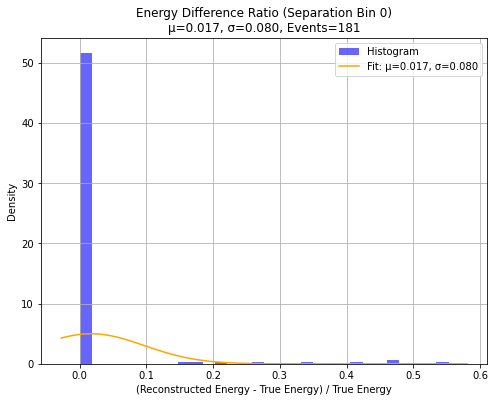

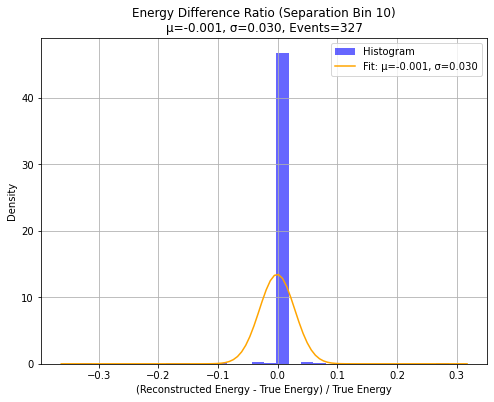

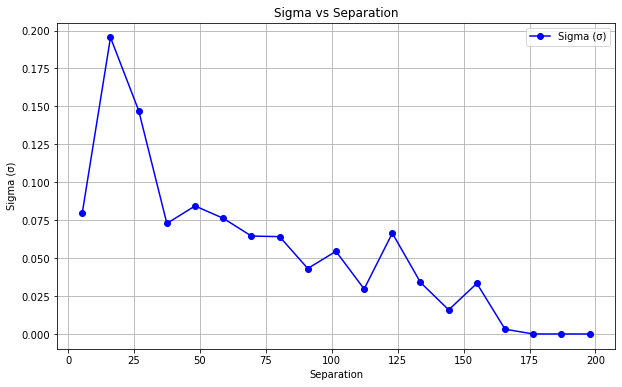

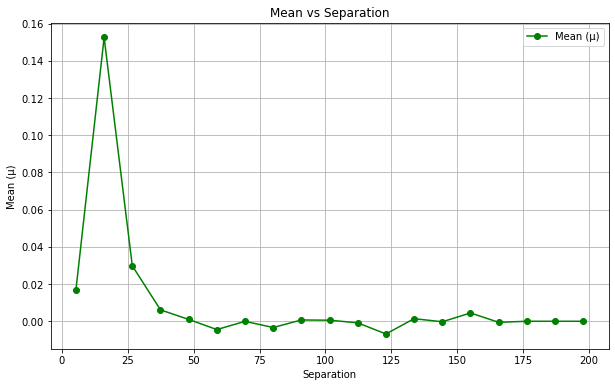

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Filter to include only associated events (reco-to-sim score < 0.2)
associated_scores = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Define bins for cp_separation
separation_bins = np.linspace(associated_scores['cp_separation'].min(), associated_scores['cp_separation'].max(), 20)
associated_scores['separation_bin'] = pd.cut(associated_scores['cp_separation'], bins=separation_bins, labels=False, include_lowest=True)

# Initialize lists to store results
separation_bin_centers = []
sigma_values = []
mean_values = []
event_counts = []

# Loop through each separation bin
for bin_idx in range(len(separation_bins) - 1):
    # Select data for the current bin
    bin_data = associated_scores[associated_scores['separation_bin'] == bin_idx]['energy_diff_ratio']
    
    # Skip if no data in this bin
    if bin_data.empty:
        continue
    
    # Fit a Gaussian to the data
    mu, sigma = norm.fit(bin_data)
    
    # Store results
    bin_center = (separation_bins[bin_idx] + separation_bins[bin_idx + 1]) / 2
    separation_bin_centers.append(bin_center)
    sigma_values.append(sigma)
    mean_values.append(mu)
    event_counts.append(len(bin_data))

    # Plot a couple of example histograms for reference
    if bin_idx == 0 or bin_idx == len(separation_bins) // 2:  # Example: First and middle bins
        plt.figure(figsize=(8, 6))
        plt.hist(bin_data, bins=30, density=True, alpha=0.6, color='blue', label='Histogram')
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, sigma)
        plt.plot(x, p, 'orange', label=f'Fit: μ={mu:.3f}, σ={sigma:.3f}')
        plt.title(f'Energy Difference Ratio (Separation Bin {bin_idx})\nμ={mu:.3f}, σ={sigma:.3f}, Events={len(bin_data)}')
        plt.xlabel('(Reconstructed Energy - True Energy) / True Energy')
        plt.ylabel('Density')
        plt.legend()
        plt.grid()
        plt.show()

# Plot σ (sigma) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, sigma_values, 'o-', label='Sigma (σ)', color='blue')
plt.xlabel('Separation')
plt.ylabel('Sigma (σ)')
plt.title('Sigma vs Separation')
plt.grid()
plt.legend()
plt.show()

# Plot μ (mean) vs Separation
plt.figure(figsize=(10, 6))
plt.plot(separation_bin_centers, mean_values, 'o-', label='Mean (μ)', color='green')
plt.xlabel('Separation')
plt.ylabel('Mean (μ)')
plt.title('Mean vs Separation')
plt.grid()
plt.legend()
plt.show()


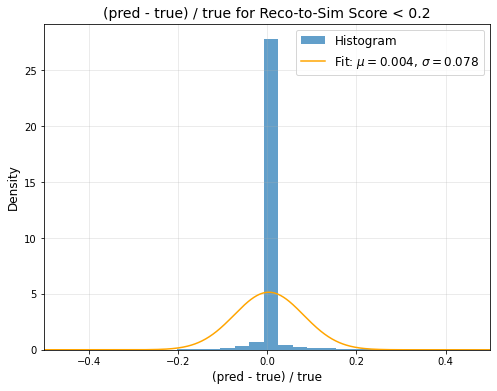

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for reco-to-sim scores < 0.2
filtered_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Calculate the (pred - true) / true for energy_diff_ratio (or adjust the column name as needed)
# Assuming 'energy_diff_ratio' is the column of interest for (pred - true) / true
values = filtered_df['energy_diff_ratio']

# Plot the histogram
plt.figure(figsize=(8, 6))
counts, bins, patches = plt.hist(values, bins=50, density=True, alpha=0.7, label='Histogram')

# Fit a Gaussian distribution to the data
mu, sigma = np.mean(values), np.std(values)
x = np.linspace(bins[0], bins[-1], 1000)
pdf = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)
plt.plot(x, pdf, label=f'Fit: $\mu={mu:.3f}$, $\sigma={sigma:.3f}$', color='orange')

# Add labels and title
plt.title('(pred - true) / true for Reco-to-Sim Score < 0.2', fontsize=14)
plt.xlim(-0.5, 0.5)
plt.xlabel('(pred - true) / true', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.3)

# Save or show the plot
plt.show()


/tmp/ipykernel_2164983/2270509428.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)


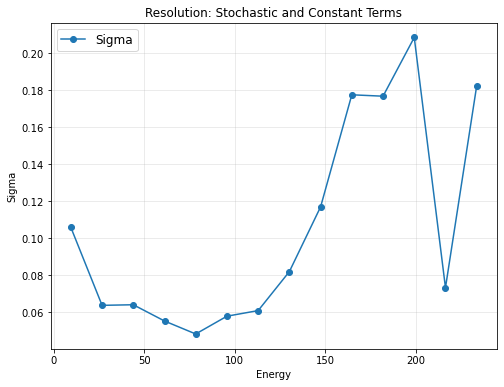

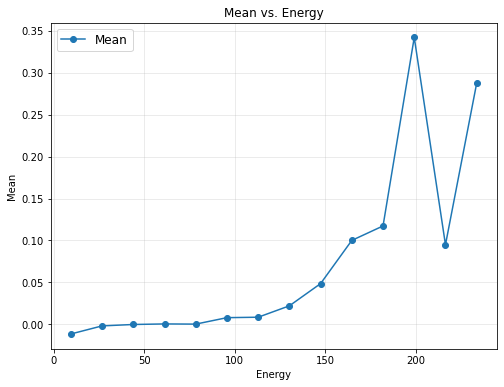

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Assuming df_scores is your DataFrame with all the relevant data
# Filter the DataFrame for tracksters that have been reconstructed (reco_to_sim_score < 0.2)
reconstructed_df = df_scores[df_scores['reco_to_sim_score'] < 0.2]

# Group the data into energy bins
energy_bins = np.linspace(reconstructed_df['trackster_energy'].min(), reconstructed_df['trackster_energy'].max(), 15)
reconstructed_df['energy_bin'] = pd.cut(reconstructed_df['trackster_energy'], bins=energy_bins)

# Initialize lists to store results
bin_centers = []
sigmas = []
means = []

# Loop over each bin
for energy_bin, group in reconstructed_df.groupby('energy_bin'):
    if group.empty:
        continue

    # Calculate the bin center
    bin_center = (energy_bin.left + energy_bin.right) / 2
    bin_centers.append(bin_center)

    # Fit a Gaussian to the (pred - true) / true values
    values = group['energy_diff_ratio']
    mu, sigma = norm.fit(values)

    # Store the mean and sigma
    means.append(mu)
    sigmas.append(sigma)

# Plot sigma vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, sigmas, 'o-', label='Sigma')
plt.title('Resolution: Stochastic and Constant Terms')
plt.xlabel('Energy')
plt.ylabel('Sigma')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

# Plot mean vs. energy
plt.figure(figsize=(8, 6))
plt.plot(bin_centers, means, 'o-', label='Mean')
plt.title('Mean vs. Energy')
plt.xlabel('Energy')
plt.ylabel('Mean')
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()


# ROC curve

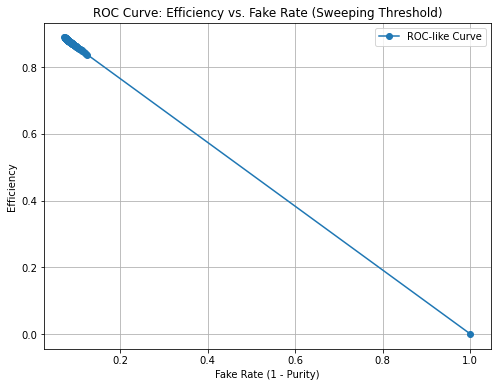

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_scores is your DataFrame:
df_scores['cp_id'] = pd.to_numeric(df_scores['cp_id'], errors='coerce')
df_scores['trackster_id'] = pd.to_numeric(df_scores['trackster_id'], errors='coerce')

# Prepare groupings that won't change as threshold sweeps:
# For efficiency calculation:
cp_valid = df_scores.dropna(subset=['cp_id']).copy()
cp_grouped = cp_valid.groupby(['event_index', 'cp_id'])

# For purity calculation:
tst_valid = df_scores.dropna(subset=['trackster_id']).copy()
tst_grouped = tst_valid.groupby(['event_index', 'trackster_id'])

thresholds = np.linspace(0, 0.01, 200)
efficiencies = []
fake_rates = []

for t in thresholds:
    # Compute Efficiency at threshold t
    # Check if CP is associated: min(sim_to_reco_score) < t
    cp_associated = cp_grouped['sim_to_reco_score'].min() < t
    num_associated_cp = cp_associated.sum()
    total_cp = cp_associated.count()
    efficiency = num_associated_cp / total_cp if total_cp > 0 else 0.0

    # Compute Purity at threshold t
    # Check if Trackster is associated: min(reco_to_sim_score) < t
    tst_associated = tst_grouped['reco_to_sim_score'].min() < t
    num_associated_tst = tst_associated.sum()
    total_tst = tst_associated.count()
    purity = num_associated_tst / total_tst if total_tst > 0 else 0.0

    # Compute Fake Rate = 1 - Purity
    fake_rate = 1 - purity

    efficiencies.append(efficiency)
    fake_rates.append(fake_rate)

# Plot the ROC-like curve
plt.figure(figsize=(8,6))
plt.plot(fake_rates, efficiencies, marker='o', linestyle='-', label='ROC-like Curve')
plt.xlabel('Fake Rate (1 - Purity)')
plt.ylabel('Efficiency')
plt.title('ROC Curve: Efficiency vs. Fake Rate (Sweeping Threshold)')
plt.grid(True)
plt.legend()
plt.show()


In [75]:
print(efficiencies)

[0.0, 0.825973271353864, 0.8332364904125509, 0.8387565368971528, 0.8444218477629285, 0.8493608367228356, 0.8531377106333528, 0.8553166763509588, 0.8577861708309122, 0.8608367228355607, 0.8638872748402092, 0.8656304474142941, 0.8662115049389889, 0.8673736199883788, 0.8696978500871586, 0.8720220801859384, 0.8731841952353283, 0.8743463102847182, 0.8756536897152818, 0.8775421266705404, 0.8781231841952353, 0.8797210923881464, 0.8814642649622313, 0.8824811156304474, 0.8833527019174898, 0.8840790238233586, 0.8845148169668797, 0.8850958744915747, 0.8858221963974433, 0.886548518303312, 0.8868390470656595, 0.8874201045903545, 0.8882916908773969, 0.8891632771644393, 0.8897443346891343, 0.8904706565950029, 0.8909064497385241, 0.8910517141196979, 0.8916327716443928, 0.892068564787914, 0.8926496223126089, 0.8927948866937827, 0.8929401510749564, 0.8938117373619988, 0.8942475305055201, 0.8946833236490412, 0.8949738524113887, 0.89540964555491, 0.8955549099360837, 0.8958454386984311, 0.8961359674607786,

# Test

In [80]:
import torch
import numpy as np
from tqdm import tqdm  # For progress visualization
import pandas as pd
import logging

# Setup Logging
logging.basicConfig(filename='processing_errors.log', level=logging.ERROR,
                    format='%(asctime)s %(levelname)s:%(message)s')

# Define a simple Event class
class Event:
    def __init__(self, x, assoc):
        self.x = x  # Tensor or numpy array
        self.assoc = assoc  # Tensor or numpy array


In [81]:
# Define particles as per the numerical example
# Columns: x, y, z, energy, eta
# Particle 0: (0,0,0), 10, 1.0, cp=0, tst=0
# Particle 1: (1,0,0), 20, 1.1, cp=0, tst=0
# Particle 2: (0,1,0), 30, 2.0, cp=1, tst=1
# Particle 3: (1,1,0), 40, 2.1, cp=1, tst=1

# Create x: shape (num_particles, 5)
x = np.array([
    [0, 0, 0, 10, 1.0],
    [1, 0, 0, 20, 1.1],
    [0, 1, 0, 30, 2.0],
    [1, 1, 0, 40, 2.1],
])

# Create assoc: shape (num_particles, 1)
assoc = np.array([
    [0],
    [0],
    [1],
    [1],
])

# Create a single event
event = Event(x=x, assoc=assoc)

# data_test contains one event
data_test = [event]

# Define all_cluster_labels: list of lists, one per event
# For event 0: Trackster 0 contains particles 0 and 1, Trackster 1 contains 2 and 3
all_cluster_labels = [
    [0, 0, 1, 1]
]


In [82]:
# Initialize a list to store scores for all events
all_scores = []

# Determine the number of events
num_events = len(data_test)

# Iterate over all events with a progress bar
for event_idx in tqdm(range(num_events), desc="Processing Events"):
    try:
        event = data_test[event_idx]

        # Extract x, y, z, energy, and eta
        if isinstance(event.x, torch.Tensor):
            positions = event.x[:, :3].numpy()  # Extract x, y, z
            energies = event.x[:, 3].numpy()
            etas = event.x[:, 4].numpy()
        else:
            positions = event.x[:, :3]
            energies = event.x[:, 3]
            etas = event.x[:, 4]

        positions = np.array(positions)
        energies = np.array(energies)
        etas = np.array(etas)

        # Extract true labels and predicted labels
        true_labels_event = event.assoc[:, 0]
        true_cp_labels = true_labels_event.astype(int) if isinstance(true_labels_event, np.ndarray) else true_labels_event.int().numpy()
        pred_trackster_labels = np.array(all_cluster_labels[event_idx])

        # Identify unique CP IDs and Trackster IDs
        cp_ids = np.unique(true_cp_labels)
        trackster_ids = np.unique(pred_trackster_labels)

        if len(cp_ids) == 0 or len(trackster_ids) == 0:
            # Handle empty associations
            all_scores.append({
                'event_index': event_idx,
                'cp_id': None,
                'trackster_id': None,
                'sim_to_reco_score': 0.0,
                'reco_to_sim_score': 1.0,
                'cp_energy': 0.0,
                'trackster_energy': 0.0,
                'cp_avg_eta': 0.0,
                'cp_separation': 0.0,
                'energy_diff_ratio': None
            })
            continue

        # Create dictionaries mapping cluster IDs to their particle indices
        cp_clusters = {cp: np.where(true_cp_labels == cp)[0] for cp in cp_ids}
        tst_clusters = {t: np.where(pred_trackster_labels == t)[0] for t in trackster_ids}

        # Compute average positions for each true CP cluster
        cp_avg_positions = {cp: np.mean(positions[indices], axis=0) for cp, indices in cp_clusters.items()}

        # Compute separation between two CP clusters if at least 2 exist
        if len(cp_ids) >= 2:
            cp_separation = np.linalg.norm(cp_avg_positions[cp_ids[0]] - cp_avg_positions[cp_ids[1]])
        else:
            cp_separation = 0.0

        # Compute total energy and average eta for each CP cluster
        cp_total_energy = {cp: np.sum(energies[indices]) for cp, indices in cp_clusters.items()}
        cp_avg_eta = {cp: np.mean(etas[indices]) for cp, indices in cp_clusters.items()}

        # Compute total energy for each Trackster cluster
        tst_total_energy = {t: np.sum(energies[indices]) for t, indices in tst_clusters.items()}

        # Initialize dictionaries to store scores for this event
        sim_to_reco_scores = {}
        reco_to_sim_scores = {}

        # Compute Sim-to-Reco and Reco-to-Sim Scores
        for cp in cp_ids:
            for tst in trackster_ids:
                cp_indices = cp_clusters[cp]
                tst_indices = tst_clusters[tst]

                if cp_total_energy[cp] == 0 or np.sum(energies[tst_indices]) == 0:
                    sim_to_reco_scores[(cp, tst)] = 0.0
                    reco_to_sim_scores[(tst, cp)] = 1.0
                    # Append to all_scores
                    all_scores.append({
                        'event_index': event_idx,
                        'cp_id': cp,
                        'trackster_id': tst,
                        'sim_to_reco_score': 0.0,
                        'reco_to_sim_score': 1.0,
                        'cp_energy': cp_total_energy[cp],
                        'trackster_energy': tst_total_energy[tst],
                        'cp_avg_eta': cp_avg_eta[cp],
                        'cp_separation': cp_separation,
                        'energy_diff_ratio': (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]
                    })
                    continue

                # Sim-to-Reco Score
                fr_sc_i_mc = {k: energies[k] / cp_total_energy[cp] for k in cp_indices}
                fr_tst_j_reco = {
                    k: (energies[k] / np.sum(energies[tst_indices]) if k in tst_indices else 0.0)
                    for k in cp_indices
                }
                numerator = sum((fr_tst_j_reco[k] - fr_sc_i_mc[k]) ** 2 * energies[k] ** 2 for k in cp_indices)
                denominator = (sum(fr_sc_i_mc[h] * energies[h] for h in cp_indices)) ** 2
                sim_score = numerator / denominator if denominator != 0 else 0.0

                # Reco-to-Sim Score
                fr_tst_i_reco = {k: energies[k] / np.sum(energies[tst_indices]) for k in tst_indices}
                fr_sc_j_mc = {k: energies[k] / cp_total_energy[cp] if k in cp_indices else 0.0 for k in tst_indices}
                numerator_reco = sum((fr_tst_i_reco[k] - fr_sc_j_mc[k]) ** 2 * energies[k] ** 2 for k in tst_indices)
                denominator_reco = (sum(fr_tst_i_reco[h] * energies[h] for h in tst_indices)) ** 2
                reco_score = numerator_reco / denominator_reco if denominator_reco != 0 else 0.0

                # Calculate energy difference ratio
                energy_diff_ratio = (tst_total_energy[tst] - cp_total_energy[cp]) / cp_total_energy[cp]

                # Append to all_scores
                all_scores.append({
                    'event_index': event_idx,
                    'cp_id': cp,
                    'trackster_id': tst,
                    'sim_to_reco_score': sim_score,
                    'reco_to_sim_score': reco_score,
                    'cp_energy': cp_total_energy[cp],
                    'trackster_energy': tst_total_energy[tst],
                    'cp_avg_eta': cp_avg_eta[cp],
                    'cp_separation': cp_separation,
                    'energy_diff_ratio': energy_diff_ratio
                })

    except Exception as e:
        logging.error(f"Error processing event {event_idx}: {e}")
        all_scores.append({
            'event_index': event_idx,
            'cp_id': None,
            'trackster_id': None,
            'sim_to_reco_score': 0.0,
            'reco_to_sim_score': 1.0,
            'cp_energy': 0.0,
            'trackster_energy': 0.0,
            'cp_avg_eta': 0.0,
            'cp_separation': 0.0,
            'energy_diff_ratio': None
        })


Processing Events: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1618.17it/s]


In [83]:
# Convert all_scores to a DataFrame
df_scores = pd.DataFrame(all_scores, columns=[
    'event_index',
    'cp_id',
    'trackster_id',
    'sim_to_reco_score',
    'reco_to_sim_score',
    'cp_energy',
    'trackster_energy',
    'cp_avg_eta',
    'cp_separation',
    'energy_diff_ratio'
])

# Display the DataFrame
print(df_scores)


   event_index  cp_id  trackster_id  sim_to_reco_score  reco_to_sim_score  \
0            0      0             0             0.0000             0.0000   
1            0      0             1             0.6800             0.5392   
2            0      1             0             0.5392             0.6800   
3            0      1             1             0.0000             0.0000   

   cp_energy  trackster_energy  cp_avg_eta  cp_separation  energy_diff_ratio  
0       30.0              30.0        1.05            1.0           0.000000  
1       30.0              70.0        1.05            1.0           1.333333  
2       70.0              30.0        2.05            1.0          -0.571429  
3       70.0              70.0        2.05            1.0           0.000000  


In [84]:
print('yay')

yay


# Check other data

In [85]:
import uproot

In [86]:
file = uproot.open('/vols/cms/bmaier/hgcal/data/20230701_multi_particles/test/raw/particles_10_8373759_ntuple.root')

In [88]:
print(file.keys())

['ticlNtuplizer;1', 'ticlNtuplizer/tracksters;1', 'ticlNtuplizer/clusters;1', 'ticlNtuplizer/graph;1', 'ticlNtuplizer/candidates;1', 'ticlNtuplizer/trackstersMerged;1', 'ticlNtuplizer/associations;1', 'ticlNtuplizer/simtrackstersSC;1', 'ticlNtuplizer/simtrackstersCP;1', 'ticlNtuplizer/tracks;1']


In [89]:
track = file['ticlNtuplizer/tracksters;1']

In [90]:
print(track.keys())

['event', 'NClusters', 'NTracksters', 'time', 'timeError', 'regressed_energy', 'raw_energy', 'raw_em_energy', 'raw_pt', 'raw_em_pt', 'barycenter_x', 'barycenter_y', 'barycenter_z', 'trackster_barycenter_eta', 'trackster_barycenter_phi', 'EV1', 'EV2', 'EV3', 'eVector0_x', 'eVector0_y', 'eVector0_z', 'sigmaPCA1', 'sigmaPCA2', 'sigmaPCA3', 'id_probabilities', 'vertices_indexes', 'vertices_x', 'vertices_y', 'vertices_z', 'vertices_time', 'vertices_timeErr', 'vertices_energy', 'vertices_correctedEnergy', 'vertices_correctedEnergyUncertainty', 'vertices_multiplicity', 'layer_cluster_seed']


In [92]:
v_x = track['barycenter_x'].array()

In [97]:
print(len(v_x[0]))

31
